# Unidade II - Atividades de Aprendizagem Supervisionada
# Aula 01: Construção de Modelos Preditivos
# Roteiro
 * Aprendizagem de Máquina Supervisionada
 * Estudo de Caso
 * Importação dos Dados
 * Transformação dos Dados
 * Treinamento

## Aprendizagem de Máquina Supervisionada

Aprendizagem de Máquina (AM) é a ciência (ou a arte) de criar sistemas que podem aprender com base em um **conjunto de dados** (treinamento). Uma definição mais generalista descreve AM como "o campo de estudos que fornece aos computadores a habilidade de aprender sem serem explicitamente programados".

Os sistemas de AM podem ser classificados de acordo com a **quantidade e o tipo de supervisão** que recebem durante o treinamento. Existem três categorias principais: aprendizagem supervisionada, aprendizagem não supervisionada, e aprendizagem semi-supervisionada ou por reforço.

Na aprendizagem supervisionada, o algoritmo "aprende" ou reconhece padrões com base em exemplos. Na classificação, o algoritmo, também chamado de classificador, reconhece o padrão de um conjunto de dados para prever o valor de um atributo especial denominado classe.

Na **aprendizagem supervisionada**, o algoritmo "aprende" ou reconhece padrões com base em dados de treinamento. Os dados que você utiliza para treinar o algoritmo incluem um atributo especial que classifica cada instância do conjunto de dados, chamado de classe ou rótulo. 

Se a pergunta pode ser respondida apenas com Sim/Não, ou admite apenas um conjunto discreto de respostas, selecionadas a partir de um número finito de escolhas, estamos em frente a um problema de **Classificação**. Por exemplo: 
 * Dados os resultados de um teste clínico, o paciente sofre de diabetes? 
 * Dadas as características de uma planta, é possível determinar a sua espécie?
 
Por outro lado, se a pergunta a ser respondida é a previsão de uma quantidade com valor real, nos deparamos com um problema de **Regressão**. Por exemplo: 
 * A partir das características de um imóvel, qual é o seu valor de mercado?
 * Dados os registros anteriores de atividade do usuário em Apps, por quanto tempo um determinado cliente ficará conectado ao nosso App.
 
Nesta unidade, conheceremos as atividades que são executadas em problemas de aprendizagem supervisionada, seja classificação ou regressão.

## Estudo de caso
Queremos prever com base nas informações preenchidas pelo cliente que está solicitando um empréstimo se ele será concedido ou não até certo limite. Usaremos dados do Lending Club. 

Podemos usar o data set para tentar prever empréstimos aceitos sem sucesso. Um pedido de empréstimo é mal sucedido se o valor financiado (funded_amnt) ou o valor financiado pelos investidores (funded_amnt_inv) fica muito aquém do valor do empréstimo solicitado (loan_amnt). Isso pode ser determinado pela seguinte fórmula:
$$\frac{loan - funded}{loan}\geq 0.95$$

## 1. Importação dos dados

A primeira atividade em um processo de aprendizagem supervisionada será importar os dados de que precisamos para treinar o algoritmo. Eles podem estar armazenados em diferentes formatos, sendo os arquivos do tipo CSV um dos mais comuns.

In [3]:
from __future__ import division
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

filename = 'files/lending_club_loans.csv'
df = pd.read_csv(filename, low_memory=False)
col_names = df.columns.tolist()
print (col_names)
print ('Numero de Atributos: ' + str(len(col_names)))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

## 2. Transformação dos dados

Depois de realizar a importação, geralmente precisamos transformar os dados em uma representação adequada para modelos de aprendizagem de máquina. Para muitos algoritmos, essa representação terá a forma de uma estrutura vetorial ou de matriz que contém dados numéricos.

**Apagar as colunas que não são úteis para nosso estudo.**

In [4]:
drop_cols = ['id', 'member_id', 'grade', 'sub_grade','earliest_cr_line', 'emp_title', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'inq_last_6mths', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code']

In [5]:
df = df.drop(drop_cols,axis=1)

In [8]:
col_names = df.columns.tolist()
col_names

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'mths_since_last_delinq',
 'total_acc',
 'last_fico_range_high',
 'last_fico_range_low',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_del

**Checar as features (atributos)**

In [6]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,10+ years,RENT,24000.0,27.65,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,0.1527,59.83,< 1 year,RENT,30000.0,1.00,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,0.1596,84.33,10+ years,RENT,12252.0,8.72,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,0.1349,339.31,10+ years,RENT,49200.0,20.00,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,0.1269,67.79,1 year,RENT,80000.0,17.94,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN


Observe os atributos term, emp_length, home_ownership. 

term e emp_length e emp_length são strings, podemos usar várias estratégias para processá-las: podemos vetorizar os diferentes resultados. Mas observe que existe uma relação de ordem. Nesse caso específico, os valores categóricos podem ser traduzidos diretamente em números que representam essa ordem. Finalmente, house_ownership será vetorizado em tantos recursos quantos forem os valores na variável categórica.

In [7]:
def clear_term (row):
    try:
        if row['term']==' 36 months':
            d = 1
        else:
            if row['term']==' 60 months':
                d = 2
            else:
                if np.isnan(row['term']):
                    d = None
                else:
                    print ('WRONG')
                    print (row['term'])
    except:
        print ('EXCEPT')
        d = None
    return d

df['term_clean'] = df.apply (lambda row: clear_term(row),axis=1)
    

In [7]:
df['term_clean']

0        1.0
1        2.0
2        1.0
3        1.0
4        2.0
        ... 
42533    1.0
42534    1.0
42535    1.0
42536    NaN
42537    NaN
Name: term_clean, Length: 42538, dtype: float64

In [8]:
#Usaremos um dicionário para fazer o mapeamento
def clean_emp_length(argument):
    switcher = {
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9,
        '10+ years': 10,
        '< 1 year': 0,
        'n/a':None,
    }
    try:
        d = switcher[argument['emp_length']]    
    except:
        d = None
    return d

df['emp_length_clean'] = df.apply (lambda row: clean_emp_length(row),axis=1)


In [9]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,term_clean,emp_length_clean
0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,10+ years,RENT,24000.0,27.65,...,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,1.0,10.0
1,2500.0,2500.0,2500.0,60 months,0.1527,59.83,< 1 year,RENT,30000.0,1.00,...,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,2.0,0.0
2,2400.0,2400.0,2400.0,36 months,0.1596,84.33,10+ years,RENT,12252.0,8.72,...,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,1.0,10.0
3,10000.0,10000.0,10000.0,36 months,0.1349,339.31,10+ years,RENT,49200.0,20.00,...,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,1.0,10.0
4,3000.0,3000.0,3000.0,60 months,0.1269,67.79,1 year,RENT,80000.0,17.94,...,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,2.0,1.0


In [9]:
from sklearn.feature_extraction import DictVectorizer

comb_dict = df[['home_ownership']].to_dict(orient='records')
vec = DictVectorizer()
home = 2*vec.fit_transform(comb_dict).toarray()-1
home[:5]

array([[-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.]])

In [10]:
df_vector = pd.DataFrame(home[:,1:])
vector_columns = vec.get_feature_names()
df_vector.columns = vector_columns[1:]
df_vector.index = df.index
df_vector


,home_ownership=MORTGAGE,home_ownership=NONE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT
0,-1.0,-1.0,-1.0,-1.0,1.0
1,-1.0,-1.0,-1.0,-1.0,1.0
2,-1.0,-1.0,-1.0,-1.0,1.0
3,-1.0,-1.0,-1.0,-1.0,1.0
4,-1.0,-1.0,-1.0,-1.0,1.0
...,...,...,...,...,...
42533,-1.0,-1.0,-1.0,-1.0,1.0
42534,-1.0,1.0,-1.0,-1.0,-1.0
42535,1.0,-1.0,-1.0,-1.0,-1.0
42536,-1.0,-1.0,-1.0,-1.0,-1.0


**Juntar os dados**

In [13]:
df = df.join(df_vector)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,term_clean,emp_length_clean,home_ownership=MORTGAGE,home_ownership=NONE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT
0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,10+ years,RENT,24000.0,27.65,...,NaN,NaN,NaN,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
1,2500.0,2500.0,2500.0,60 months,0.1527,59.83,< 1 year,RENT,30000.0,1.00,...,NaN,NaN,NaN,2.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0
2,2400.0,2400.0,2400.0,36 months,0.1596,84.33,10+ years,RENT,12252.0,8.72,...,NaN,NaN,NaN,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
3,10000.0,10000.0,10000.0,36 months,0.1349,339.31,10+ years,RENT,49200.0,20.00,...,NaN,NaN,NaN,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
4,3000.0,3000.0,3000.0,60 months,0.1269,67.79,1 year,RENT,80000.0,17.94,...,NaN,NaN,NaN,2.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0


**Apagar as colunas processadas**

In [14]:
df = df.drop(['term','int_rate','emp_length','home_ownership'],axis=1)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,mths_since_last_delinq,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,term_clean,emp_length_clean,home_ownership=MORTGAGE,home_ownership=NONE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT
0,5000.0,5000.0,4975.0,162.87,24000.0,27.65,0.0,735.0,739.0,NaN,...,NaN,NaN,NaN,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
1,2500.0,2500.0,2500.0,59.83,30000.0,1.00,0.0,740.0,744.0,NaN,...,NaN,NaN,NaN,2.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0
2,2400.0,2400.0,2400.0,84.33,12252.0,8.72,0.0,735.0,739.0,NaN,...,NaN,NaN,NaN,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
3,10000.0,10000.0,10000.0,339.31,49200.0,20.00,0.0,690.0,694.0,35.0,...,NaN,NaN,NaN,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0
4,3000.0,3000.0,3000.0,67.79,80000.0,17.94,0.0,695.0,699.0,38.0,...,NaN,NaN,NaN,2.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0


**Configuração dos Gráficos**

In [11]:
import matplotlib.pylab as plt

%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='times')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))


**Importação de um arquivo com todas as tranformações necessários**:

In [12]:
import pickle
ofname = open('files/dataset_small.pkl','rb') 
(x,y) = pickle.load(ofname, encoding="bytes")

**Checar o volume dos dados**

In [13]:
dims = x.shape[1]
N = x.shape[0]
print ('atributos: ' + str(dims)+', exemplos: '+ str(N))

atributos: 15, exemplos: 4140


In [22]:
print(y.shape)

(4140,)


## 3. Treinamento

A próxima etapa é o **treinamento**: executar o algoritmo usando o conjunto de dados para que ele "aprenda" a reconhecer o padrão de cada classe. A partir daí, o classificador pode ser usada para perver o resultado sobre dados novos.

In [23]:
from sklearn import neighbors
from sklearn import datasets

#Criar uma instância do algoritmo de classificação KNN (K-nearest neighbor)
knn = neighbors.KNeighborsClassifier(n_neighbors=11)

#Treinar o classificador
knn.fit(x,y)

#Calcular o valor previsto de acordo com o modelo
yhat = knn.predict(x)

#Checar o resultado do último exemplo
print ('Valor previsto: ' + str (yhat [ -1]), ', valor real: ' + str (y [ -1]))

Valor previsto: -1.0 , valor real: -1.0


**Avaliação da qualidade dos classificadores: Matriz de confusão**

Uma matriz de confusão é uma tabela que é usada para descrever o desempenho de um classificador, ao prever a classe de exemplos que não estão no conjunto original de dados (treinamento). Cada linha na matriz representa as instâncias da classe prevista, e cada coluna representa as instâncias da classe real.

Calcular a matriz de confusão:
+ VP (verdadeiro positivo): o classificador prevê um exemplo como positivo, e ele realmente é positivo.
+ FP (falso positivo): o classificador prevê um exemplo como positivo, mas ele é negativo.
+ VN (verdadeiro negativo): o classificador prevê um exemplo como negativo, e ele realmente é negativo.
+ FN (falso negativo): o classificador prevê um exemplo como negativo, mas ele é positivo.

**Métricas de Avaliação do Classificador**

Acurácia: indica a proporção de previsões corretas.

$$Acurácia = \frac{VP + VN}{VP + VN + FP + FN}$$

Precision: é a proporção de cada verdadeiro positivo com o total de positivos. Podemos pensar nessa métrica como um ruído de medição das previsões, isto é, quando o classificador prevê algo como positivo, qual a probabilidade de realmente ser positivo.

$$Precision = \frac{VP}{VP + FP}$$

Recall: é a proporção de cada observação positiva que é verdadeiramente positiva. Podemos pensar nessa métrica como a habilidade do classificador em identificar observações da classe positiva.

$$Recall = \frac{VP}{VP + FN}$$

F1-Score: é uma métrica que busca equilibrar precision e recall, por meio de uma média harmônica (tipo de média utilizada para proporções):

$$F1 Score = \frac{2 * precision * recall}{precision + recall}$$

Vamos calcular a Acurácia: **Número de Previsões Corretas / Total de Previsões**

In [25]:
knn.score(x,y)

0.8316425120772947

A distribuição dos rótulos de predição é dada pelo seguinte gráfico:

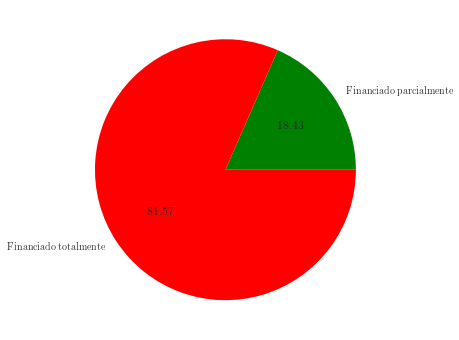

In [26]:
import numpy as np
plt.pie(np.c_[np.sum(np.where(y==1,1,0)),np.sum(np.where(y==-1,1,0))][0],
        labels=['Financiado parcialmente','Financiado totalmente'],
        colors=['g','r'],
        shadow=False,
        autopct ='%.2f' )
plt.gcf().set_size_inches((6,6))
plt.savefig("plots/pie.png",dpi=300, bbox_inches='tight')


**Calcular e visualizar a Matriz de Confusão**

In [27]:
yhat = knn.predict(x)
TP = np.sum(np.logical_and(yhat==-1,y==-1))
TN = np.sum(np.logical_and(yhat==1,y==1))
FP = np.sum(np.logical_and(yhat==-1,y==1))
FN = np.sum(np.logical_and(yhat==1,y==-1))
print ('TP: '+ str(TP), ', FP: '+ str(FP))
print ('FN: '+ str(FN), ', TN: '+ str(TN))

TP: 3370 , FP: 690
FN: 7 , TN: 73


In [28]:
from sklearn import metrics
metrics.confusion_matrix(yhat,y)

array([[3370,  690],
       [   7,   73]])